In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
import holidays as holidays
from datetime import timedelta
from sklearn.metrics import mean_absolute_error
from prophet.plot import plot

### Pre-processing for Prophet

In [156]:
# Preprocessed data given as input
df = pd.read_csv('data.csv')
df.head()

,A53_M5_3007 (Belegungen/Intervall),D11 (Belegungen/Intervall),D12 (Belegungen/Intervall),D21 (Belegungen/Intervall),D31 (Belegungen/Intervall),D41 (Belegungen/Intervall),D42 (Belegungen/Intervall),H53_M3_3006 (Belegungen/Intervall),H53_M6_1140 (Belegungen/Intervall),H57_M1_1137 (Belegungen/Intervall),Date,Time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-01-06,00:01:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:02:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:03:00
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2021-01-06,00:04:00


#### Creating one single DateTime column and taking hourly_average of data

In [157]:
# Creating a single column for date and time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(['Date', 'Time'], axis=1)

In [158]:
df.set_index('Datetime', inplace=True)
# Resample the data to calculate the hourly average
hourly_average = df.resample('H').mean()

In [159]:
hourly_average.head()

,A53_M5_3007 (Belegungen/Intervall),D11 (Belegungen/Intervall),D12 (Belegungen/Intervall),D21 (Belegungen/Intervall),D31 (Belegungen/Intervall),D41 (Belegungen/Intervall),D42 (Belegungen/Intervall),H53_M3_3006 (Belegungen/Intervall),H53_M6_1140 (Belegungen/Intervall),H57_M1_1137 (Belegungen/Intervall)
Datetime,,,,,,,,,,
2021-01-06 00:00:00,0.200000,0.083333,0.050000,0.033333,0.0,0.150000,0.583333,0.133333,0.0,0.133333
2021-01-06 01:00:00,0.033333,0.033333,0.116667,0.000000,0.0,0.066667,0.583333,0.066667,0.0,0.066667
2021-01-06 02:00:00,0.000000,0.033333,0.050000,0.000000,0.0,0.050000,0.366667,0.000000,0.0,0.000000
2021-01-06 03:00:00,0.050000,0.016667,0.016667,0.016667,0.0,0.050000,0.300000,0.033333,0.0,0.033333
2021-01-06 04:00:00,0.100000,0.066667,0.050000,0.050000,0.0,0.116667,0.466667,0.150000,0.0,0.150000


#### Amplification and Rounding-off hourly data to get integer values

In [160]:
hourly_average=np.round(hourly_average*10) # To get more distinct values
#hourly_average = hourly_average.apply(lambda x: np.ceil(x) if x > 0.5 else np.floor(x))
hourly_average.head()

,A53_M5_3007 (Belegungen/Intervall),D11 (Belegungen/Intervall),D12 (Belegungen/Intervall),D21 (Belegungen/Intervall),D31 (Belegungen/Intervall),D41 (Belegungen/Intervall),D42 (Belegungen/Intervall),H53_M3_3006 (Belegungen/Intervall),H53_M6_1140 (Belegungen/Intervall),H57_M1_1137 (Belegungen/Intervall)
Datetime,,,,,,,,,,
2021-01-06 00:00:00,2.0,1.0,0.0,0.0,0.0,2.0,6.0,1.0,0.0,1.0
2021-01-06 01:00:00,0.0,0.0,1.0,0.0,0.0,1.0,6.0,1.0,0.0,1.0
2021-01-06 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2021-01-06 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2021-01-06 04:00:00,1.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,0.0,2.0


#### Speficying the time-series column and prediction-variable column for prophet

In [161]:
columns_to_keep = ['D11 (Belegungen/Intervall)']
hourly_average = hourly_average[columns_to_keep]
hourly_average = hourly_average.reset_index();
#hourly_average.index.name = 'Datetime'
ts=hourly_average.copy()
ts.tail()

,Datetime,D11 (Belegungen/Intervall)
25531,2023-12-05 19:00:00,10.0
25532,2023-12-05 20:00:00,6.0
25533,2023-12-05 21:00:00,4.0
25534,2023-12-05 22:00:00,4.0
25535,2023-12-05 23:00:00,3.0


In [162]:
ts.columns=['ds','y']
ts.head()
ts.fillna(0, inplace=True)

#ts=ts.draopna()

<AxesSubplot:xlabel='ds'>

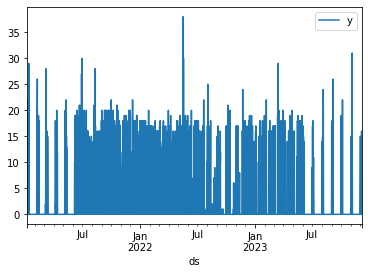

In [163]:
ts.set_index('ds').plot()

### Model Training

In [164]:
# Adding Germany-Hessen holidays to the model
########### Only used test values : add proper holidays list
hessen_holidays_2021 = [
    '2021-01-01',  # New Year's Day
    '2021-04-02',  # Good Friday
    '2021-04-05',  # Easter Monday
    '2021-05-01',  # Labor Day
    '2021-05-13',  # Ascension Day
    '2021-05-24',  # Whit Monday
    '2021-08-15',  # Assumption Day
    '2021-10-03',  # German Unity Day
    '2021-10-31',  # Reformation Day
    '2021-11-01',  # All Saints' Day
    '2021-12-25',  # Christmas Day
    '2021-12-26',  # Boxing Day
]
hessen_holidays_2022 = [
    '2022-01-01',  # New Year's Day
    '2022-04-15',  # Good Friday
    '2022-04-18',  # Easter Monday
    '2022-05-01',  # Labor Day
    '2022-05-26',  # Ascension Day
    '2022-06-06',  # Whit Monday
    '2022-08-15',  # Assumption Day
    '2022-10-03',  # German Unity Day
    '2022-10-31',  # Reformation Day
    '2022-11-01',  # All Saints' Day
    '2022-12-25',  # Christmas Day
    '2022-12-26',  # Boxing Day
]
hessen_holidays_2023 = [
    '2023-01-01',  # New Year's Day
    '2023-04-07',  # Good Friday
    '2023-04-10',  # Easter Monday
    '2023-05-01',  # Labor Day
    '2023-05-25',  # Ascension Day
    '2023-06-05',  # Whit Monday
    '2023-08-15',  # Assumption Day
    '2023-10-03',  # German Unity Day
    '2023-10-31',  # Reformation Day
    '2023-11-01',  # All Saints' Day
    '2023-12-25',  # Christmas Day
    '2023-12-26',  # Boxing Day
]

# Combine the holiday lists for all three years
hessen_holidays_combined = hessen_holidays_2021 + hessen_holidays_2022 + hessen_holidays_2023
# Create a DataFrame with "ds" and "holiday" columns
holidays_df = pd.DataFrame({
    'ds': pd.to_datetime(hessen_holidays_combined),
    'holiday': 'hessen_holiday'
})


In [165]:
model = Prophet(holidays=holidays_df)
model.fit(ts)
future = model.make_future_dataframe(50)
forecast = model.predict(future)
forecast.head()

00:52:23 - cmdstanpy - INFO - Chain [1] start processing
00:52:42 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-06 00:00:00,2.203506,-5.339882,5.628759,2.203506,2.203506,-2.068238,-2.068238,-2.068238,-3.120838,...,0.290949,0.290949,0.290949,0.761651,0.761651,0.761651,0.0,0.0,0.0,0.135268
1,2021-01-06 01:00:00,2.202520,-5.474232,5.067840,2.202520,2.202520,-2.354002,-2.354002,-2.354002,-3.389554,...,0.276835,0.276835,0.276835,0.758716,0.758716,0.758716,0.0,0.0,0.0,-0.151482
2,2021-01-06 02:00:00,2.201535,-5.703599,4.598800,2.201535,2.201535,-2.598996,-2.598996,-2.598996,-3.620022,...,0.265235,0.265235,0.265235,0.755791,0.755791,0.755791,0.0,0.0,0.0,-0.397461
3,2021-01-06 03:00:00,2.200549,-6.296973,4.936104,2.200549,2.200549,-2.726604,-2.726604,-2.726604,-3.735644,...,0.256166,0.256166,0.256166,0.752874,0.752874,0.752874,0.0,0.0,0.0,-0.526055
4,2021-01-06 04:00:00,2.199563,-5.782797,5.018297,2.199563,2.199563,-2.587306,-2.587306,-2.587306,-3.586884,...,0.249611,0.249611,0.249611,0.749967,0.749967,0.749967,0.0,0.0,0.0,-0.387743


In [166]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25586 entries, 0 to 25585
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          25586 non-null  datetime64[ns]
 1   trend                       25586 non-null  float64       
 2   yhat_lower                  25586 non-null  float64       
 3   yhat_upper                  25586 non-null  float64       
 4   trend_lower                 25586 non-null  float64       
 5   trend_upper                 25586 non-null  float64       
 6   additive_terms              25586 non-null  float64       
 7   additive_terms_lower        25586 non-null  float64       
 8   additive_terms_upper        25586 non-null  float64       
 9   daily                       25586 non-null  float64       
 10  daily_lower                 25586 non-null  float64       
 11  daily_upper                 25586 non-null  float64   

Text(57.875, 0.5, 'Traffic at D11')

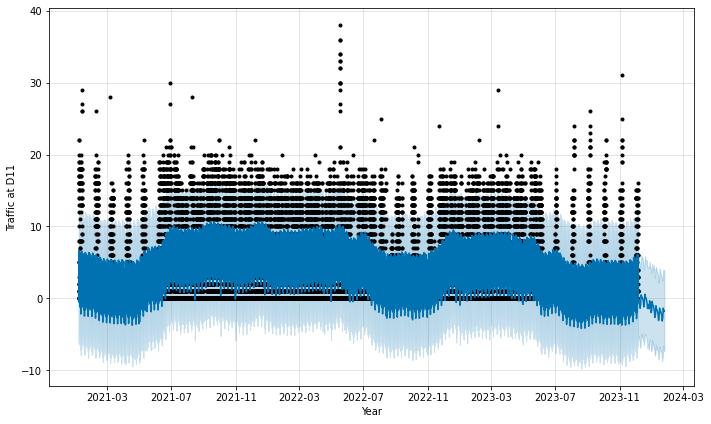

In [167]:
model.plot(forecast);
plt.xlabel('Year')
plt.ylabel('Traffic at D11')

#### Seasonal components of model

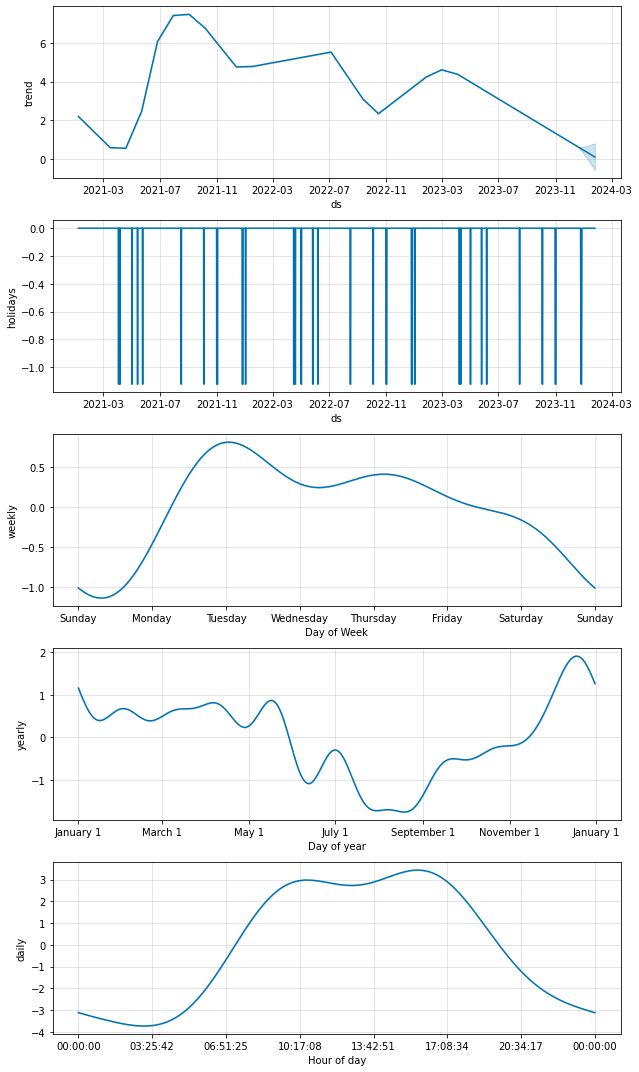

In [168]:
model.plot_components(forecast);

#### Identifying major trend change points

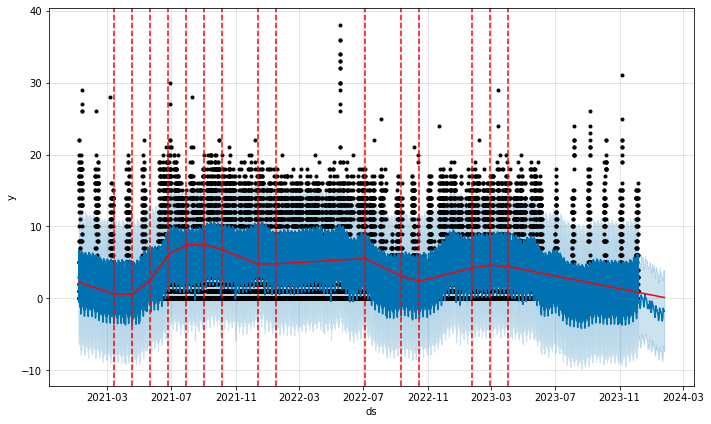

In [169]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast);
add_changepoints_to_plot(fig.gca(),model,forecast);

In [170]:
model.changepoints

817     2021-02-09 01:00:00
1634    2021-03-15 02:00:00
2451    2021-04-18 03:00:00
3268    2021-05-22 04:00:00
4085    2021-06-25 05:00:00
4902    2021-07-29 06:00:00
5720    2021-09-01 08:00:00
6537    2021-10-05 09:00:00
7354    2021-11-08 10:00:00
8171    2021-12-12 11:00:00
8988    2022-01-15 12:00:00
9805    2022-02-18 13:00:00
10622   2022-03-24 14:00:00
11439   2022-04-27 15:00:00
12256   2022-05-31 16:00:00
13073   2022-07-04 17:00:00
13890   2022-08-07 18:00:00
14707   2022-09-10 19:00:00
15525   2022-10-14 21:00:00
16342   2022-11-17 22:00:00
17159   2022-12-21 23:00:00
17976   2023-01-25 00:00:00
18793   2023-02-28 01:00:00
19610   2023-04-03 02:00:00
20427   2023-05-07 03:00:00
Name: ds, dtype: datetime64[ns]

In [171]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('daily',
              {'period': 1,
               'fourier_order': 4,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

### Evaluating Prophet Model - Forecast

In [172]:
# Create training set (all except the last 7 days)
#train_endpoint = len(ts) - 168
#train = ts.copy().iloc[:train_endpoint]
#train.fillna(0, inplace=True)

validation_end_date = ts['ds'].max()
validation_start_date = validation_end_date - pd.DateOffset(days=6)
validation_start_date = pd.to_datetime(validation_start_date) 

validation_df = ts.copy().loc[ts['ds'] >= validation_start_date]
training_df = ts.copy().loc[ts['ds'] < validation_start_date]

# Print the last few rows of the train DataFrame to verify
print(training_df.tail())

                       ds    y
25386 2023-11-29 18:00:00  0.0
25387 2023-11-29 19:00:00  0.0
25388 2023-11-29 20:00:00  0.0
25389 2023-11-29 21:00:00  0.0
25390 2023-11-29 22:00:00  0.0


In [173]:
validation_df.tail(15)

,ds,y
25521,2023-12-05 09:00:00,13.0
25522,2023-12-05 10:00:00,12.0
25523,2023-12-05 11:00:00,16.0
25524,2023-12-05 12:00:00,15.0
25525,2023-12-05 13:00:00,14.0
25526,2023-12-05 14:00:00,14.0
25527,2023-12-05 15:00:00,15.0
25528,2023-12-05 16:00:00,12.0
25529,2023-12-05 17:00:00,11.0
25530,2023-12-05 18:00:00,9.0


In [174]:
# Add regressor - zero as lower bound 
training_df['lower_bound'] = 0

In [175]:
model_2 = Prophet(holidays=holidays_df)
model_2.add_regressor('lower_bound')
model_2.fit(training_df)

00:54:51 - cmdstanpy - INFO - Chain [1] start processing
00:55:12 - cmdstanpy - INFO - Chain [1] done processing


In [186]:
# Calculatng the 7 days ahead to predict
#max_timestamp = train['ds'].max()
#future = []
#for i in range(7):
#    date = (max_timestamp - timedelta(days=i)).strftime('%Y-%m-%d')
#    for hour in range(24):
#        time = f'{hour:02d}:00:00'
#        datetime_str = f'{date} {time}'
#        future.append(datetime_str)
        
## Create a DataFrame from the 'future' list
#future_df = pd.DataFrame(future, columns=['ds'])
#future_df['ds'] = pd.to_datetime(future_df['ds'])
#future_df['lower_bound'] = 0


forecast_start_date = validation_start_date
forecast_end_date = validation_end_date


forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='1H')
forecast_df = pd.DataFrame({'ds': forecast_dates})
forecast_df['lower_bound'] = 0

In [187]:
forecast_dates[:5]

DatetimeIndex(['2023-11-29 23:00:00', '2023-11-30 00:00:00',
               '2023-11-30 01:00:00', '2023-11-30 02:00:00',
               '2023-11-30 03:00:00'],
              dtype='datetime64[ns]', freq='H')

In [188]:
# use the model to make a forecast
forecast_2 = model_2.predict(forecast_df)
# Post-processing: Ensure non-negativity
forecast_2['yhat'] = forecast_2[['yhat', 'lower_bound']].max(axis=1)  # Replace negative values with lower bound

forecast_2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
140,2023-12-05 19:00:00,-0.115499,-3.190786,7.272959,-0.115499,-0.115499,2.083219,2.083219,2.083219,0.721955,...,0.386318,0.386318,0.386318,0.974946,0.974946,0.974946,0.0,0.0,0.0,1.967720
141,2023-12-05 20:00:00,-0.116337,-4.573796,5.843991,-0.116337,-0.116337,0.760208,0.760208,0.760208,-0.578898,...,0.361809,0.361809,0.361809,0.977297,0.977297,0.977297,0.0,0.0,0.0,0.643871
142,2023-12-05 21:00:00,-0.117176,-5.987439,4.838412,-0.117176,-0.117176,-0.306213,-0.306213,-0.306213,-1.625153,...,0.339286,0.339286,0.339286,0.979654,0.979654,0.979654,0.0,0.0,0.0,0.000000
143,2023-12-05 22:00:00,-0.118015,-6.517304,4.176772,-0.118015,-0.118015,-1.041049,-1.041049,-1.041049,-2.342014,...,0.318948,0.318948,0.318948,0.982017,0.982017,0.982017,0.0,0.0,0.0,0.000000
144,2023-12-05 23:00:00,-0.118853,-7.337526,3.662082,-0.118853,-0.118853,-1.514489,-1.514489,-1.514489,-2.799830,...,0.300956,0.300956,0.300956,0.984385,0.984385,0.984385,0.0,0.0,0.0,0.000000


Converted all Nan values to 0 (both in true dataset and in train dataset given to model)

#### Evaluation metrics - MAE

In [189]:
y_true = validation_df['y'].values
y_pred = forecast_2['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 3.611


#### Plots

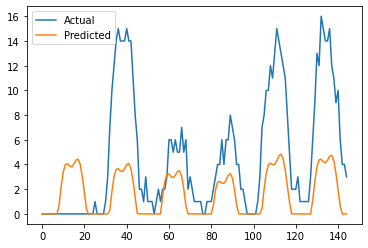

In [190]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

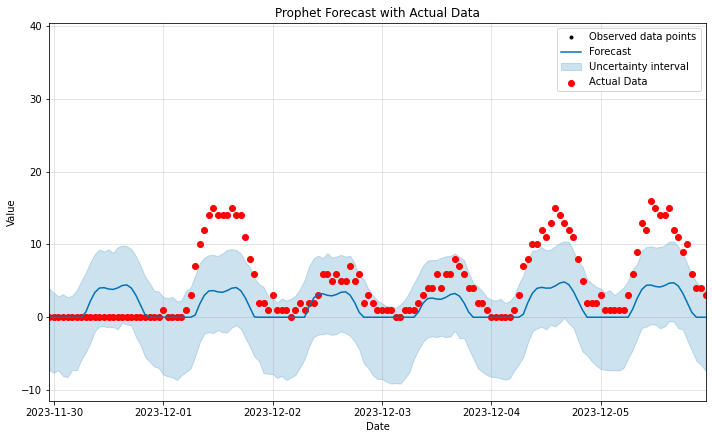

In [192]:
# Forecast of model and actual datapoints
forecast_start_date = forecast_2['ds'].min()
forecast_end_date = forecast_2['ds'].max()
forecasted_part = forecast_2[(forecast_2['ds'] >= forecast_start_date) & (forecast_2['ds'] <= forecast_end_date)]

# Plot only the forecasted part
#fig = plot(model_2, forecasted_part)
fig = model_2.plot(forecast_2, xlabel='Date', ylabel='Value', plot_cap=False)


plt.xlim(forecast_start_date, forecast_end_date)
# Actual values
plt.scatter(ts['ds'], ts['y'], color='red', label='Actual Data', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Forecast with Actual Data')
plt.legend()


plt.show()